In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 
import seaborn as sns
pd.options.mode.chained_assignment = None
pth = '../Data/'
flist= glob.glob('*.csv', root_dir=pth)

flist.sort()

In [30]:
def clean_data(df): 
    # Assuming df is your DataFrame and 'your_column' is the column you want to clean
    column = 'Normalized'
    window_size = 20 # Define your window size here
    std_dev_threshold = 10  # Define your standard deviation threshold here
    df = df[df['Normalized']!=0]
    # Step 4: Calculate moving average and moving standard deviation
    df['moving_avg'] = df[column].rolling(window=window_size, min_periods=1).mean()
    df['moving_std'] = df[column].rolling(window=window_size, min_periods=1).std()

    # Step 6: Identify outliers
    # A point is considered an outlier if it is more than std_dev_threshold standard deviations from the moving average
    df['is_outlier'] = ((df[column] < (df['moving_avg'] - std_dev_threshold * df['moving_std'])) | 
                        (df[column] > (df['moving_avg'] + std_dev_threshold * df['moving_std'])))
    
    # Step 7: Filter out the outliers
    df_clean = df[~df['is_outlier']]

    # Optionally, drop the helper columns if they are no longer needed
    df_clean = df_clean.drop(columns=['moving_avg', 'moving_std', 'is_outlier'])
    return df_clean

In [28]:
flist

['lv1_XRR_1_scan1.csv',
 'lv2_XRR_1_scan1.csv',
 'lv3_XRR_1_scan1.csv',
 'lv4_XRR_1_scan1.csv',
 'lv5_XRR_1_scan1.csv',
 'lv6_XRR_1_redo_scan1.csv',
 'lv6_XRR_1_scan1.csv',
 'lv7_XRR_1_scan1.csv',
 'su01_XRR_1_remeas_scan1.csv',
 'su01_XRR_3_scan1.csv',
 'su02_XRR_1_scan1.csv',
 'su03_XRR_1_scan1.csv',
 'su04_XRR_1_scan1.csv']

## Load data, remove outliers, save data 

(0.0, 0.8)

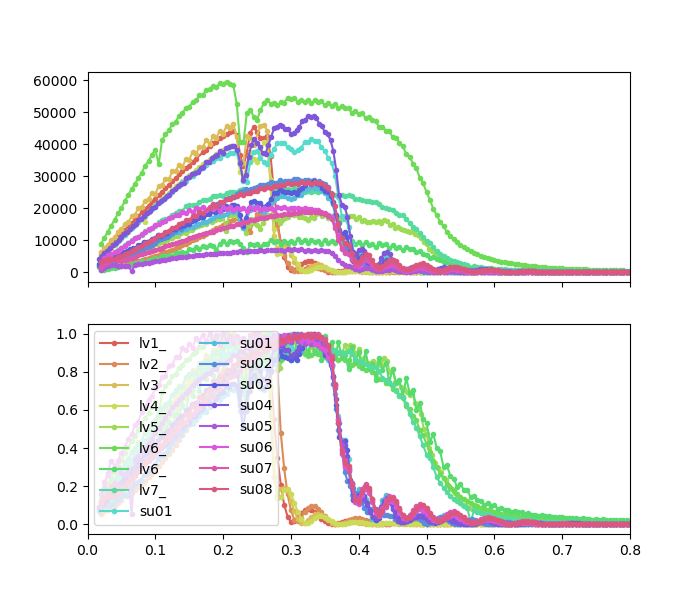

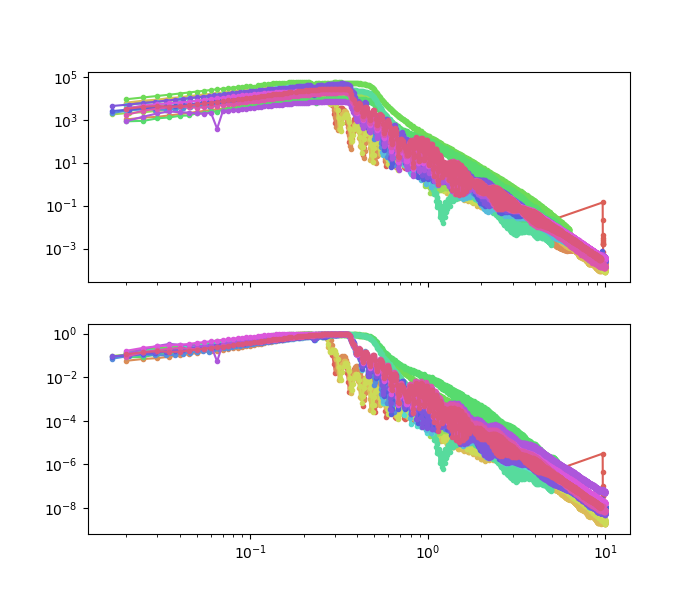

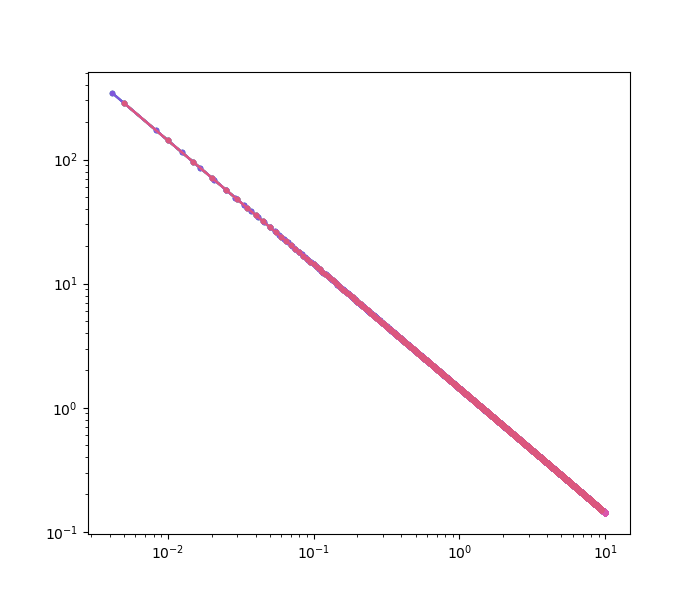

In [31]:
plot_all=False
sns.set_palette("hls", len(flist))

fig, ax = plt.subplots(2,1, figsize=(7,6), sharex=True)
fig2, ax2 = plt.subplots(2,1, figsize=(7,6), sharex=True)
fig3, ax3 = plt.subplots(1,1, figsize=(7,6), sharex=True)
%matplotlib widget
for fname in flist: 
    output_name = fname[0:-4] + '.txt'
    df = pd.read_csv(pth + fname)

    df.columns = df.columns.str.strip()
    #print(df.keys())

    # Now df_clean contains your data without the outliers based on the moving average method
    chop_start = 4
    ang= df['tth']*np.pi/180

    df['cot'] = 1 / np.tan(ang)
    df['cot'][0]=np.nan
    df['x_err']=df['cot']/40
    
    df_clean = clean_data(df[chop_start:])

    ax[0].plot(df_clean['tth'], df_clean['Normalized'],'.-')
    ax[1].plot(df_clean['tth'], df_clean['Normalized']/np.nanmax(df_clean['Normalized']), '.-',label=fname[0:4])

    ax2[0].loglog(df_clean['tth'], df_clean['Normalized'],'.-')
    ax2[1].loglog(df_clean['tth'], df_clean['Normalized']/np.nanmax(df_clean['Normalized']), '.-',label=fname[0:4])
    if plot_all: 
        plt.figure()
        plt.plot(df['tth'], df['Normalized'],'.', zorder = -1, color='blue')
        plt.plot(df_clean['tth'], df_clean['Normalized'],'.')
        plt.xlim([0,0.8])
    
    ax3.loglog(df['tth'], df['x_err'],'.-')
    # Step 1: Select the two columns from the DataFrame
    selected_columns = df_clean[['tth', 'Normalized','x_err']]

    # Step 2: Save the selected columns to a text file without headers
    selected_columns.to_csv(pth + output_name, header=False, index=False, sep='\t')

ax[1].legend(ncol=2)
ax[0].set_xlim(0,0.8)
ax[1].set_xlim(0,0.8)


In [17]:
ang= df['tth']*np.pi/180


[2.03718327e+07 1.37632019e+04 6.86781013e+03 ... 5.67611137e+00
 5.67368913e+00 5.67128020e+00]
